<a href="https://colab.research.google.com/github/88kHw88/Winc.Assignment.CO2/blob/main/Kopie_van_Assignment_CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Importing data and selecting table
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
data_CO2 = table [1]

#Renaming columns
data_CO2.columns = ["country","1990", "2005", "2017", "2017_world_%", "2017vs1990_change_%", "land_area", "per_capita"]

#set 'country' as index
#Removing rows that aren't countries (including European Union) https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
data_index = data_CO2.set_index('country')
data = data_index.drop(["World", "World – International Aviation", "World – International Shipping", "European Union"], axis=0)


# **Graph 1: CO2 of the bigger countries**

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

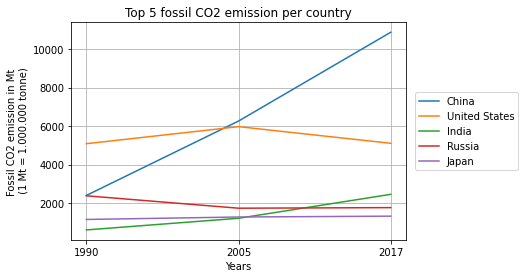

<Figure size 432x288 with 0 Axes>

In [3]:
# 5  biggest CO2 producers based on Mt CO2 of latest measurement (2017)
# X-axis are years 1990, 2005 and 2017
# Y-axis is the amount of CO2 emission of the given year
# make a graph (line graph)

#define variable 'years'
years = data.columns[0:3]

#define Mt CO2 data [countries, [years]]
data_set = data.loc["Afghanistan":"Zimbabwe",["1990", "2005", "2017"]]

#sort top 5 according of year 2017
#https://stackoverflow.com/questions/16958499/sort-pandas-dataframe-and-print-highest-n-values
data_mt = data_set.sort_values("2017", ascending = False).head(5)


#plot line chart
fig = plt.figure()
fig, ax = plt.subplots()

#for-loop to plot line chart
for index, row in data_mt.iterrows():
  plt.plot(years, row[0:], label = index)

#line chart settings
ax.set_xlabel("Years")
ax.set_ylabel("Fossil CO2 emission in Mt\n (1 Mt = 1.000.000 tonne)")
ax.set_title('Top 5 fossil CO2 emission per country')
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.grid(True)
plt.figure()

### **Graph 2: worst and best changers**

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

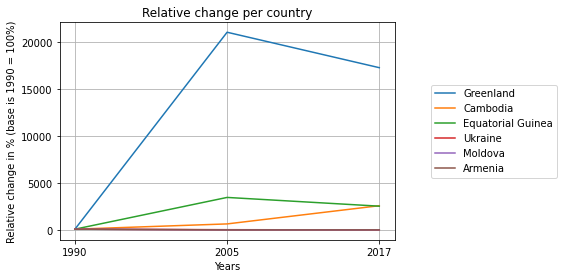

<Figure size 432x288 with 0 Axes>

In [4]:
#Calculate relative change in emissions for each country (1990 = 100%)
#Add those results in the Dataframe
#Find top 3 and bottom 3 of relative change in emission (based of 2017?)
#Plot their results
#X-axis are years
#Y-axis 'relative' amount of CO2 where 1990 is 100%



#make calculation to calculate relative change
base_1990 = ((data['1990'] / data['1990'] * 100))
change_2005 = round((data['2005'] / data['1990'] * 100), 2)
change_2017 = round((data['2017'] / data['1990'] * 100), 2)



#adding new columns to 'data' 
#https://stackoverflow.com/questions/39050539/how-to-add-multiple-columns-to-pandas-dataframe-in-one-assignment
data["base_1990_in_%"], data["change_2005_in_%"], data["change_2017_in_%"] = base_1990, change_2005, change_2017


#define years 
year = data.columns[0:3]


#define relative change data [countries, [years]]
data_set_change = data.loc["Afghanistan":"Zimbabwe",['base_1990_in_%', 'change_2005_in_%', 'change_2017_in_%']]
#then: sort column 'change_2017_in_%' in descending order and pick top 3
top_bottom = data_set_change.sort_values("change_2017_in_%", ascending=False).head(3)
#append the bottom 3 into the data
#https://stackoverflow.com/questions/42504984/python-pandas-select-both-head-and-tail 
top_bottom = top_bottom.append(data_set_change.sort_values("change_2017_in_%", ascending=False).tail(3))


#plot line chart
fig = plt.figure()
fig, ax = plt.subplots()

#for-loop to plot line chart
for index, row in top_bottom.iterrows():
  plt.plot(year, row[0:], label = index)

#line chart settings
ax.set_xlabel("Years")
ax.set_ylabel("Relative change in % (base is 1990 = 100%)")
ax.set_title('Relative change per country')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.grid(True)
plt.figure()




### **Make another graph to exclude all countries with <5 Mt in 1990**

<Figure size 720x1080 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

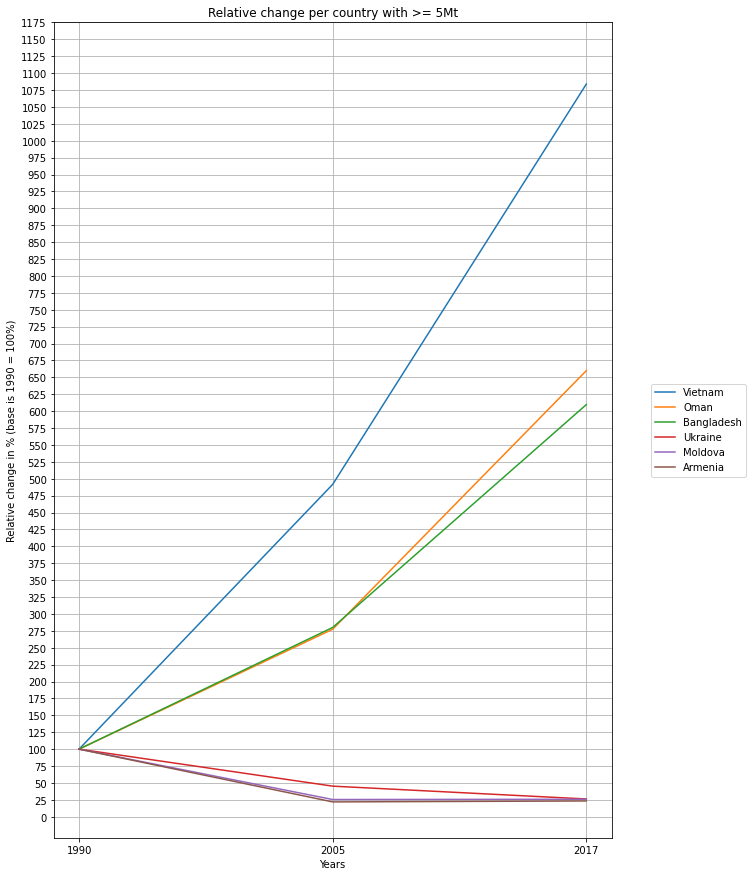

<Figure size 720x1080 with 0 Axes>

In [6]:
#add column 1990 in our data
data_5 = data.loc["Afghanistan":"Zimbabwe",['1990', 'base_1990_in_%', 'change_2005_in_%', 'change_2017_in_%']]

#Select countries with CO2 emission >= 5 Mt
data_5 = data_5.loc[data_5["1990"] >=5 ]


#Select top 3, based on relative change in 2017
top_bottom_5 = data_5.sort_values("change_2017_in_%", ascending=False).head(3)
#append the bottom 3 into the data
#https://stackoverflow.com/questions/42504984/python-pandas-select-both-head-and-tail 
top_bottom_5 = top_bottom_5.append(data_5.sort_values("change_2017_in_%", ascending=False).tail(3))

#define years 
year = data.columns[0:3]


#plot line chart
fig = plt.figure()
fig, ax = plt.subplots()

#for-loop to plot line chart
for index, row in top_bottom_5.iterrows():
    plt.plot(year, row[1:], label = index)

#line chart settings
#https://stackabuse.com/change-tick-frequency-in-matplotlib/ (yticks = stepsize)
ax.set_xlabel("Years")
ax.set_ylabel("Relative change in % (base is 1990 = 100%)")
ax.set_title('Relative change per country with >= 5Mt')
plt.rcParams["figure.figsize"] = (10, 15) #plot scaling
plt.yticks(np.arange(0, 1200, 25))
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.grid(True)
plt.figure()

In [7]:
%load_ext google.colab.data_table
top_bottom_5

,1990,base_1990_in_%,change_2005_in_%,change_2017_in_%
country,,,,
Vietnam,20.182,100.0,491.68,1083.78
Oman,11.884,100.0,277.38,659.89
Bangladesh,13.868,100.0,280.03,609.65
Ukraine,783.210,100.0,45.25,26.27
Moldova,31.957,100.0,25.47,25.86
Armenia,20.699,100.0,21.94,23.34
